In [ ]:
import os
import glob
import ast
import json
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
from dance_evaluation import *
import matplotlib.pyplot as plt

def load_from_pickle(filepath):
    # filepath = os.path.join(readpath, filename)
    with open(filepath, "rb") as f:
        json_tempodata = pickle.load(f)
    return json_tempodata

#### Load files

In [7]:
a = 60
b = 140
mode = "zero_uni"

scr_key = "score_multi_pair"
seg_name = "both_hand_y_both_foot_y"

bpm_dict = {"bpm_avg": 0,  "bpm_mode": 1, "bpm_median": 2}

path1 = f"./saved_result/tempo_{a}_{b}/hit_genrewise_{seg_name}_{scr_key}_{mode}_{a}_{b}.pkl"

hits_genrewise = load_from_pickle(path1)      # hits summary genre wise          
hits_genrewise["bpm_median"]

,genre,total,both_hand_y_both_foot_y_count,both_hand_y_both_foot_y_percentage
0,Break,99,91,91.92
1,Pop,141,102,72.34
2,Lock,141,92,65.25
3,Middle Hip-hop,140,129,92.14
4,LA style Hip-hop,141,118,83.69
5,House,136,134,98.53
6,Waack,141,73,51.77
7,Krump,137,95,69.34
8,Street Jazz,129,54,41.86
9,Ballet Jazz,136,57,41.91


#### Tempo Estimation Accuracy by Genre

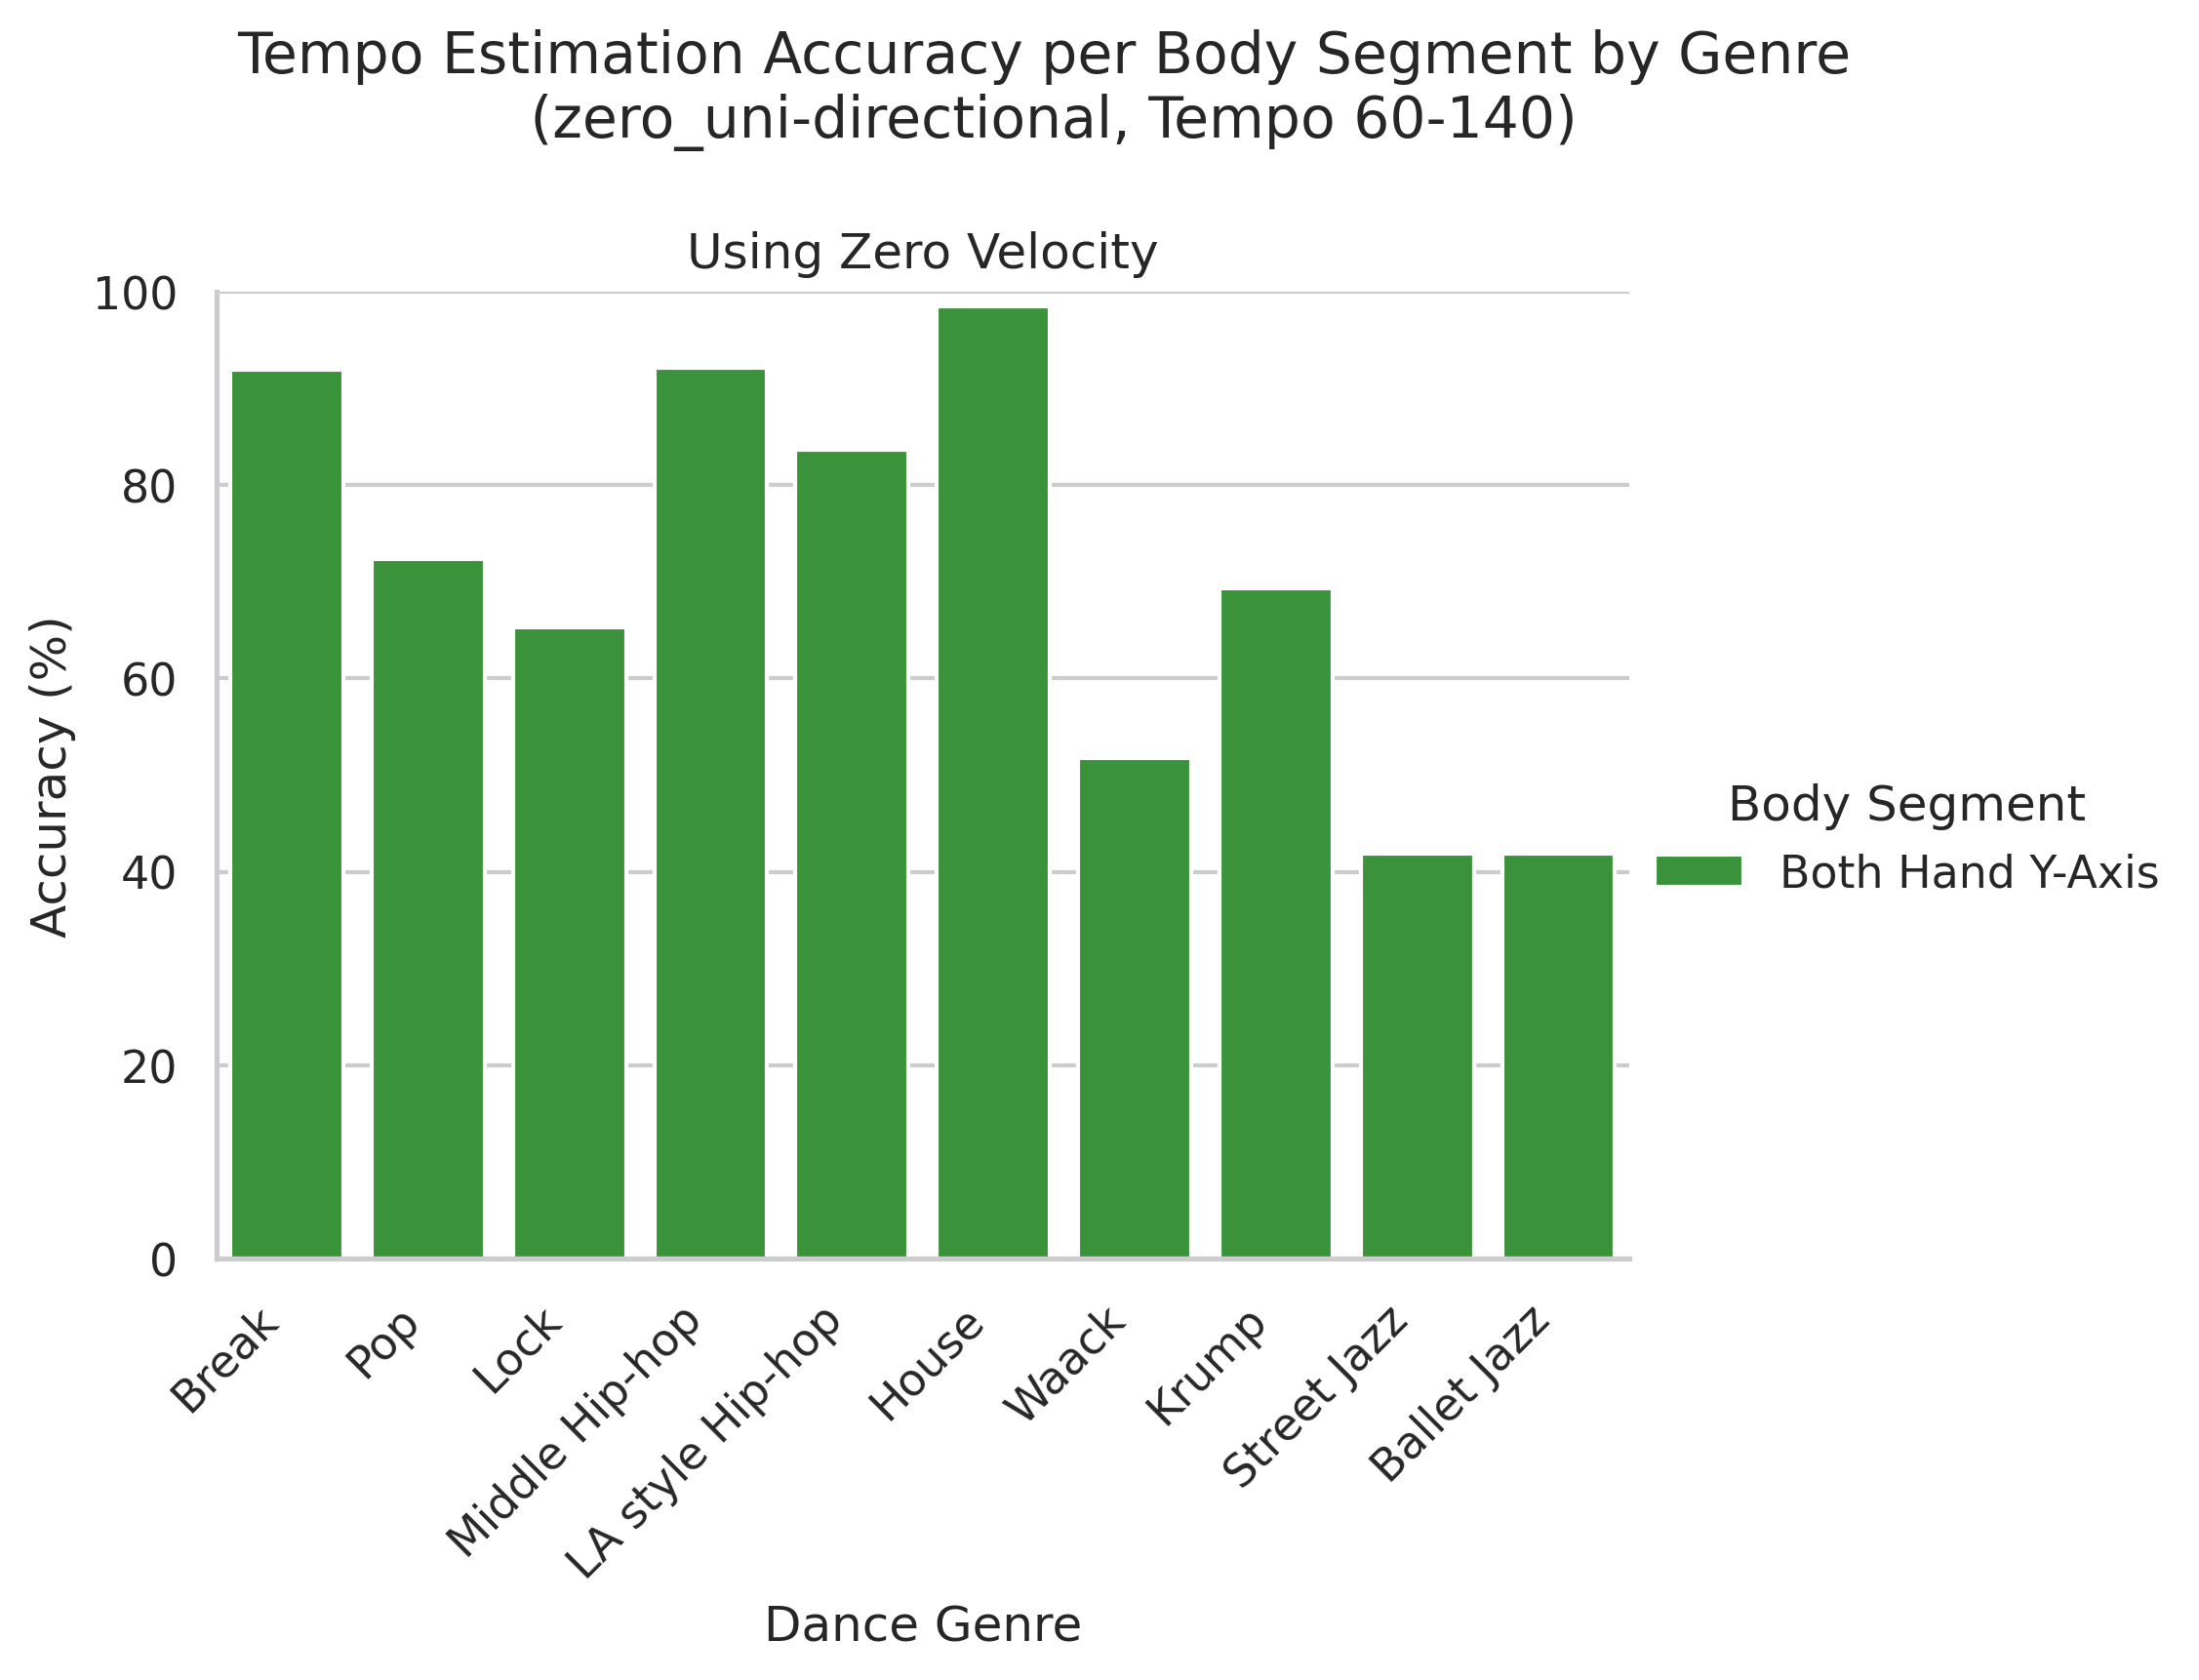

In [9]:
def melt_df(df, metric_label):
    melted = df.melt(
        id_vars=["genre"],
        value_vars=['both_hand_y_both_foot_y_percentage',
                    ],
        var_name="Segment",
        value_name="Accuracy"
    )
    # Mapping for cleaner labels
    segment_map = {
        "both_hand_y_both_foot_y_percentage": "Both Hand Y-Axis",
    }
    melted["Segment"] = melted["Segment"].map(segment_map)
    melted["Metric"] = metric_label
    return melted


# Combine all metrics
pos_melt = melt_df(hits_genrewise['bpm_median'], "Using Zero Velocity")

# posvel_melt = melt_df(posvel_hits_stats_genrewise['bpm_median_xy'], "PosVel Median XY")

combined_df = pd.concat([pos_melt])

palette = {
    "Both Hand Y-Axis": "#2ca02c",   # Dark Green

}


# Faceted grouped vertical bar chart
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=combined_df,
    kind="bar",
    x="genre", y="Accuracy", hue="Segment",
    col="Metric",
    palette=palette,
    height=5, aspect=1.2,
    legend_out=True,
    sharey=False,
)

g.figure.set_dpi(300)
g.set_axis_labels("Dance Genre", "Accuracy (%)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
g.set(ylim=(0, 100))
g._legend.set_title("Body Segment")

# Add percentage labels on top of bars
# for ax in g.axes.flat:
#     for container in ax.containers:
#         ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=9)

plt.subplots_adjust(top=0.80)
g.figure.suptitle(f"Tempo Estimation Accuracy per Body Segment by Genre\n ({mode}-directional, Tempo {a}-{b})", fontsize=14)
plt.show()

#### BoxPlot: Tempo Accuracy Distributions Across Dance

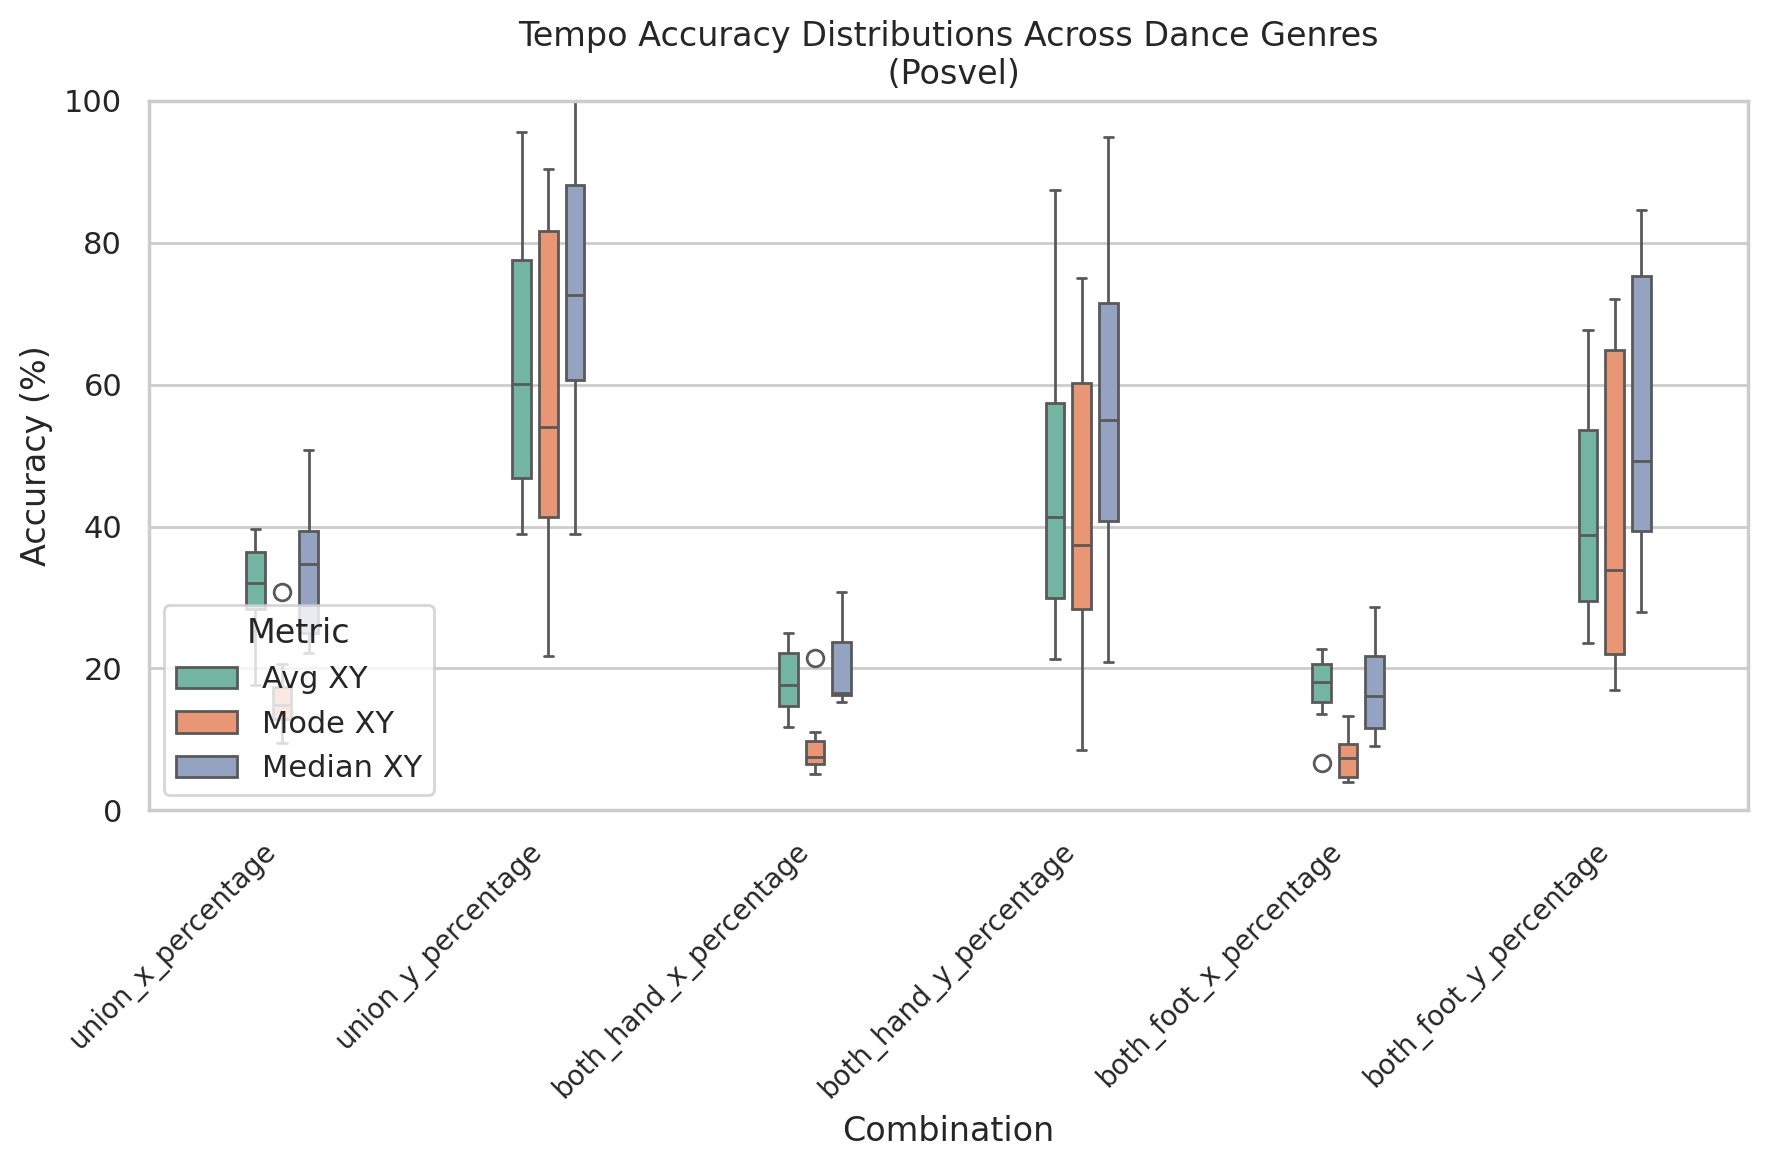

In [29]:
combination = [
    'union_x_percentage', 'union_y_percentage', 'both_hand_x_percentage', 'both_hand_y_percentage',
    'both_foot_x_percentage', 'both_foot_y_percentage'
]

# Melt each dataframe for long-form representation
avg_xy = pos_hits_stats_genrewise["bpm_avg"].melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
avg_xy["Consistency Type"] = "Avg XY"

avg_mode = pos_hits_stats_genrewise["bpm_mode"].melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
avg_mode["Consistency Type"] = "Mode XY"

avg_median = pos_hits_stats_genrewise["bpm_median"].melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
avg_median["Consistency Type"] = "Median XY"

# Combine all long-form dataframes
combined_long = pd.concat([avg_xy, avg_mode, avg_median])

# Create the grouped boxplot
plt.figure(figsize=(9, 6), dpi=200)
sns.boxplot(
    data=combined_long,
    x="Type",
    y="Consistency (%)",
    hue="Consistency Type",  # Grouping by Consistency Type
    palette="Set2",
    width=0.3,
    gap=0.3,
    # fill=False,
    linewidth=1
)

# Plot aesthetics
plt.title(f"Tempo Accuracy Distributions Across Dance Genres\n (Posvel)")
plt.xlabel("Combination")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 100)
plt.legend(title="Metric", loc="lower left")
# plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
